## Breast Cancer Prediction using Machine Learning

In [3]:
import numpy as np
import pandas as pd

In [4]:
breast = pd.read_csv("breast cancer.csv")
breast.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
breast['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
breast.shape

(569, 33)

In [7]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
breast.duplicated().sum()

0

In [9]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
breast.drop('Unnamed: 32',axis=1,inplace=True)

In [11]:
breast.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Encoding the Target Variable

In [12]:
 from sklearn.preprocessing import LabelEncoder
 le = LabelEncoder()

In [13]:
breast['diagnosis'] = breast['diagnosis'].map({"M":1,'B':0})

In [14]:
breast['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## Splitting Data into Training and Testing Sets

In [15]:
X = breast.drop('diagnosis',axis=1)
y = breast['diagnosis']

In [16]:
X.shape

(569, 31)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(455, 31)

In [20]:
X_test.shape

(114, 31)

## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
sc.fit(X_train)

StandardScaler()

In [23]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-0.23712699, -1.44075296, -0.43531947, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [-0.23702031,  1.97409619,  1.73302577, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-0.23712907, -1.39998202, -1.24962228, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [-0.17630431,  0.04880192, -0.55500086, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.23675669, -0.03896885,  0.10207345, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.2371006 , -0.54860557,  0.31327591, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

## EDA

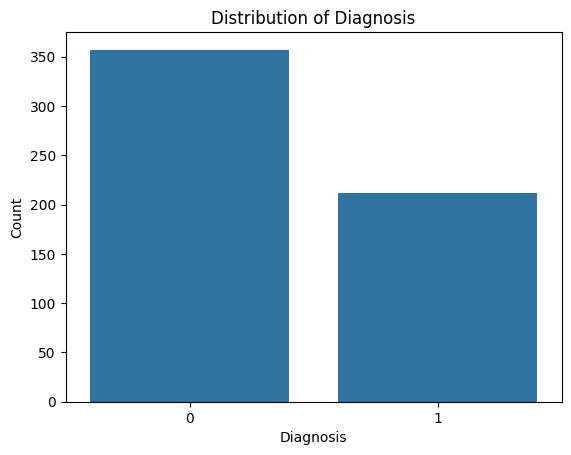

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable
sns.countplot(x=breast['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

## Training Model

In [26]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [27]:
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [28]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.9736842105263158

## Prediction System

In [31]:
input_text =  c)
np_df = np.asarray(input_text)
predictiont = lg.predict(np_df.reshape(1,-1))

if predictiont[0] == 1:
    print("Cancrous")
else:
    print("Not Cancerous")


Cancrous


In [32]:
X_test[10]

array([-0.17478099, -0.25698012,  1.42326216, -0.32031902, -0.32851959,
       -0.56328674, -0.98390686, -0.77069479, -0.72596174, -0.69922504,
       -0.96042428, -0.68451875,  0.27222162, -0.74640146, -0.47666829,
       -0.39989692, -0.94442957, -0.55196315, -0.86571951, -0.87021209,
       -0.71566322, -0.39224142,  1.43507375, -0.47432767, -0.43045164,
       -0.11415698, -0.94573859, -0.64825719, -0.82955846, -0.73083204,
       -0.89676905])

In [33]:
X_train[15]

array([-0.23716831,  1.45879684,  1.70955883,  1.48249996,  1.43172537,
       -0.12468073,  1.30274807,  0.96751527,  0.72728371,  0.15301401,
       -0.02037956,  0.54369601, -1.1022544 ,  0.32371619,  0.59550851,
       -0.6465013 ,  0.40592011,  0.06684246, -0.3580203 , -0.6301033 ,
        0.02713453,  1.64688604,  0.88542727,  1.62867989,  1.6506748 ,
        0.83999491,  2.62366381,  1.59922002,  0.98564875,  1.21584684,
        1.59477864])

In [34]:
X_train[10]

array([-0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
       -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
        0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
        0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
        0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
       -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
        0.49035329])

In [35]:
X_test[15]

array([-0.17856255,  1.41066448,  1.66731834,  1.53189226,  1.34711177,
        1.85192242,  1.44011908,  1.3202467 ,  2.59401366, -0.64459433,
        1.31678892,  0.41359151,  3.15496239,  1.42235098,  0.57283152,
        0.18206323,  1.87582022, -0.35763265,  1.03958402,  1.22338956,
        2.35969188,  0.85204248,  1.18583466,  1.02576373,  0.74246353,
        0.33255958,  0.18701549, -0.1500927 ,  1.0714669 , -0.94166942,
        0.4578207 ])

In [36]:
X_train[20]

array([-0.17706191,  0.3262708 , -1.47255821,  0.25880571,  0.20059746,
       -1.00117373, -0.78834396, -0.37765121, -0.43952114, -1.64615732,
       -1.04095987, -0.6668415 , -1.55203587, -0.64441644, -0.42538014,
       -0.8836083 , -0.71425999, -0.44888079, -0.71907206, -1.35177722,
       -0.77744331,  0.2382235 , -1.58715657,  0.19787886,  0.09825077,
       -0.4047396 , -0.22049182,  0.10329231, -0.16370153, -0.92740223,
       -0.51198703])

In [37]:
X_test[12]

array([-0.17780334,  0.24133134,  0.13492717,  0.14890784,  0.10103546,
       -0.82932645, -0.95586028, -0.87462459, -0.75989272, -1.07799795,
       -1.40198147, -0.77078368, -0.25443294, -0.75993501, -0.49659014,
       -1.09877309, -0.94975607, -0.76473013, -0.86874153, -0.16336121,
       -0.82629267, -0.05308042,  0.04692754, -0.14407359, -0.1673349 ,
       -1.17239817, -0.98674765, -0.94227941, -0.86802338, -0.41061288,
       -1.29108648])

In [38]:
import pickle
pickle.dump(lg,open('model.pkl','wb'))